# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 626


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | east london
Processing Record 4 of Set 1 | languyan
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | hasaki
Processing Record 8 of Set 1 | hawaiian paradise park
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | zouerate
Processing Record 11 of Set 1 | margaret river
Processing Record 12 of Set 1 | zwedru
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | boden
Processing Record 16 of Set 1 | longyearbyen
Processing Record 17 of Set 1 | nyurba
Processing Record 18 of Set 1 | frontino
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | bria
Processing Record 21 of Set 1 | krasnovishersk
Processing Reco

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          597
Lat           597
Lng           597
Max Temp      597
Humidity      597
Cloudiness    597
Wind Speed    597
Country       597
Date          597
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,62.64,54,17,15.59,PN,1692421195
1,east london,-33.0153,27.9116,54.54,71,75,9.22,ZA,1692421196
2,languyan,5.2618,120.0807,81.93,78,93,10.45,PH,1692421196
3,waitangi,-43.9535,-176.5597,50.83,86,27,13.24,NZ,1692421197
4,jamestown,42.0970,-79.2353,60.71,72,100,10.36,US,1692421183


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,62.64,54,17,15.59,PN,1692421195
1,east london,-33.0153,27.9116,54.54,71,75,9.22,ZA,1692421196
2,languyan,5.2618,120.0807,81.93,78,93,10.45,PH,1692421196
3,waitangi,-43.9535,-176.5597,50.83,86,27,13.24,NZ,1692421197
4,jamestown,42.0970,-79.2353,60.71,72,100,10.36,US,1692421183


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

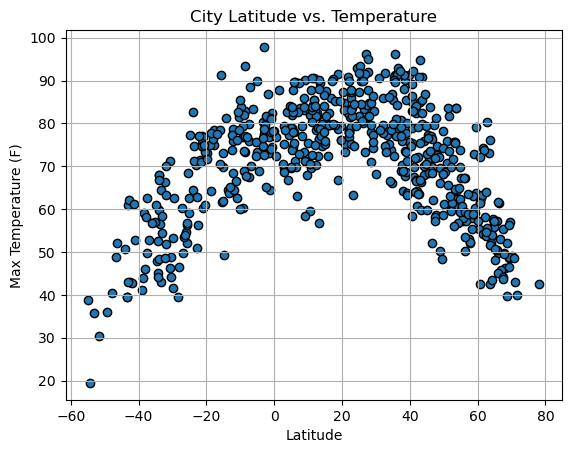

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

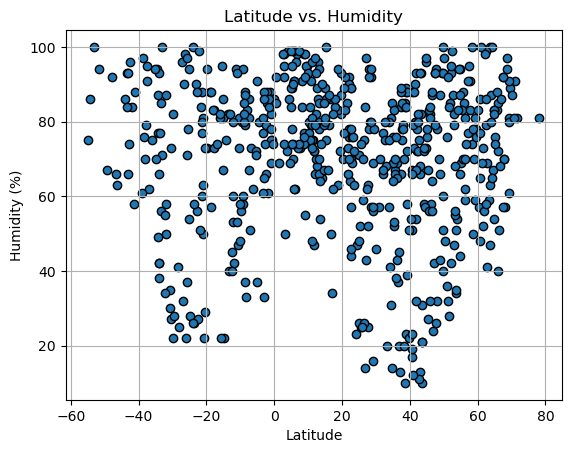

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

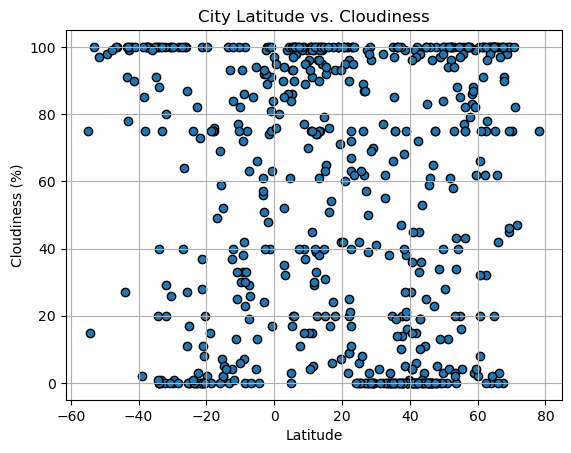

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

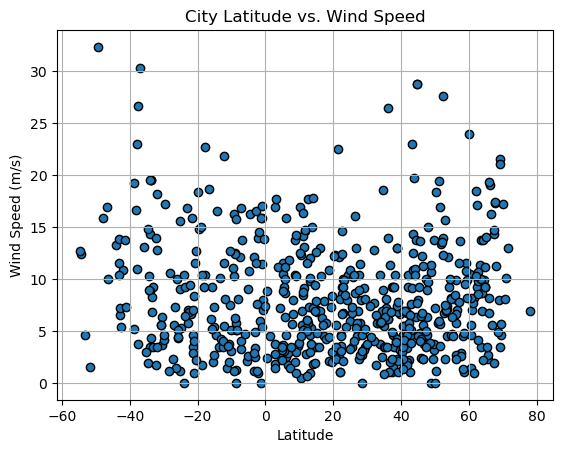

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(x_axis,y_axis)
pe_fit = pe_slope * x_axis + pe_int

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,languyan,5.2618,120.0807,81.93,78,93,10.45,PH,1692421196
4,jamestown,42.0970,-79.2353,60.71,72,100,10.36,US,1692421183
5,hasaki,35.7333,140.8333,96.31,67,0,7.25,JP,1692421198
6,hawaiian paradise park,19.5933,-154.9731,76.03,87,7,8.37,US,1692421198
8,zouerate,22.7187,-12.4521,87.12,44,63,8.52,MR,1692421199


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,62.64,54,17,15.59,PN,1692421195
1,east london,-33.0153,27.9116,54.54,71,75,9.22,ZA,1692421196
3,waitangi,-43.9535,-176.5597,50.83,86,27,13.24,NZ,1692421197
7,arraial do cabo,-22.9661,-42.0278,70.36,90,0,16.84,BR,1692421199
9,margaret river,-33.9500,115.0667,59.74,66,88,8.81,AU,1692421199


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.642375497466729
The p-value is: 1.3604878565597487e-50


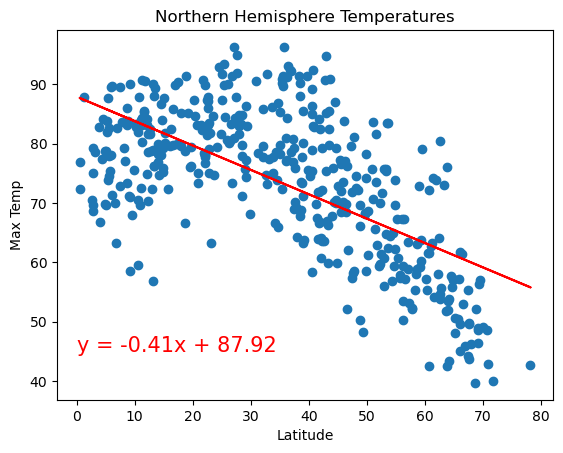

In [15]:
# Linear regression on Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Max Temp"]
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(x_axis,y_axis)
pe_fit = pe_slope * x_axis + pe_int
equation = f"y = {round(pe_slope,2)}x + {round(pe_int,2)}"

print(f"The r-value is: {pe_r}")
print(f"The p-value is: {pe_p}")

#fig = plt.figure()
#function = fig.add_subplot()
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
plt.plot(x_axis, pe_fit, color="r")
plt.text(0,45,equation,color="r",fontsize=15) 
plt.title("Northern Hemisphere Temperatures")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

The r-value is: 0.7915852748636695
The p-value is: 1.2298098630600964e-38


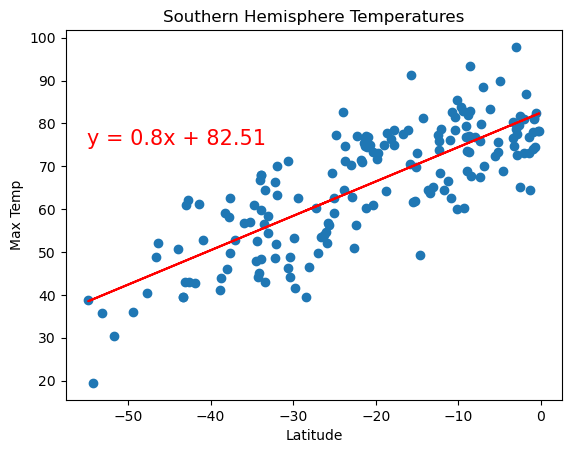

In [16]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Max Temp"]
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(x_axis,y_axis)
pe_fit = pe_slope * x_axis + pe_int
equation = f"y = {round(pe_slope,2)}x + {round(pe_int,2)}"

print(f"The r-value is: {pe_r}")
print(f"The p-value is: {pe_p}")

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
plt.plot(x_axis, pe_fit, color="r")
plt.text(-55,75,equation,color="r",fontsize=15) 
plt.title("Southern Hemisphere Temperatures")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** 
There is a strong relationship between the latitude of a location and its maximum temperature.  The closer the latitude is to 0 degrees, the higher the temperature.  In the Northern Hemisphere graph, you can see a strong negative correlation - as the latitude increases (you go from the equator to the north pole), the temperature decreases.  This has an r value of .74, which indicates a strong correlation between data points, and a very small p value (<.01) which indicates that these data points are not likely to happen by chance.  Likewise, in the southern hemisphere, there is a strong correlation (.83) and a very small p value (<.01). However, here we see a positive correlation.  As latitude decreases (you go from the equator to the south pole), temperature also decreases.  

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.11671377395556977
The p-value is: 0.016325434055765274


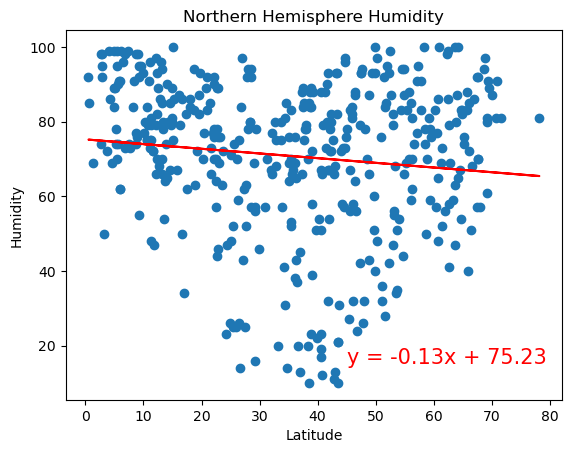

In [30]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Humidity"]
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(x_axis,y_axis)
pe_fit = pe_slope * x_axis + pe_int
equation = f"y = {round(pe_slope,2)}x + {round(pe_int,2)}"

print(f"The r-value is: {pe_r}")
print(f"The p-value is: {pe_p}")

plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
plt.plot(x_axis, pe_fit, color="r")
plt.text(45,15,equation,color="r",fontsize=15) 
plt.title("Northern Hemisphere Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-value is: -0.026703944143971904
The p-value is: 0.7265093061964425


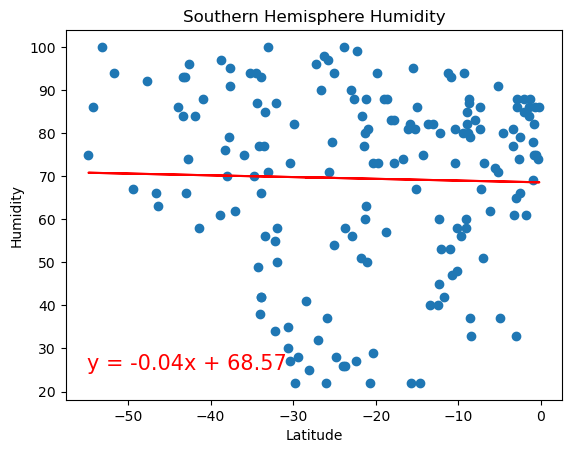

In [29]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Humidity"]
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(x_axis,y_axis)
pe_fit = pe_slope * x_axis + pe_int
equation = f"y = {round(pe_slope,2)}x + {round(pe_int,2)}"

print(f"The r-value is: {pe_r}")
print(f"The p-value is: {pe_p}")

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
plt.plot(x_axis, pe_fit, color="r")
plt.text(-55,25,equation,color="r",fontsize=15) 
plt.title("Southern Hemisphere Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** 
There appears to be no relationship between humidity and latitude in the northern hemisphere.  The r value is .03 which indicates no correlation, and the p value is .51, which indicates these measures may be the result of chance or something other than latitude.  
The southern hemisphere seems to possibly have a weak relationship between latitude and humidity.  While the r value is .15, which is very weak, the p value is .04 which indicates that as latitide increases (you get closer to the equator), humidity decreases slightly.
Generally, there seems to be a clear relationship between latitude and temperature, but not between latitude and humidity.  

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.038652972818508095
The p-value is: 0.42782546538600286


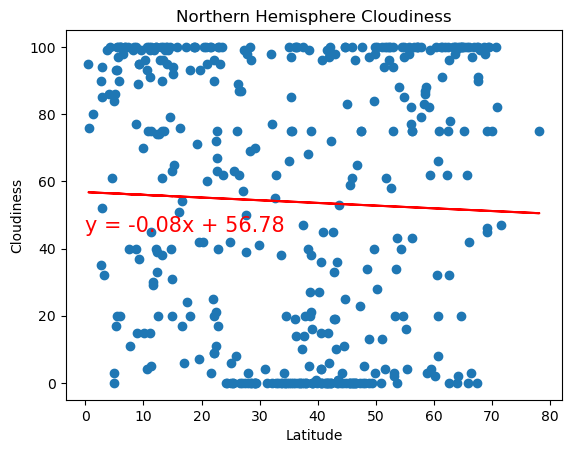

In [19]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Cloudiness"]
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(x_axis,y_axis)
pe_fit = pe_slope * x_axis + pe_int
equation = f"y = {round(pe_slope,2)}x + {round(pe_int,2)}"

print(f"The r-value is: {pe_r}")
print(f"The p-value is: {pe_p}")

plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
plt.plot(x_axis, pe_fit, color="r")
plt.text(0,45,equation,color="r",fontsize=15) 
plt.title("Northern Hemisphere Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-value is: -0.14872562949786844
The p-value is: 0.05016058161389485


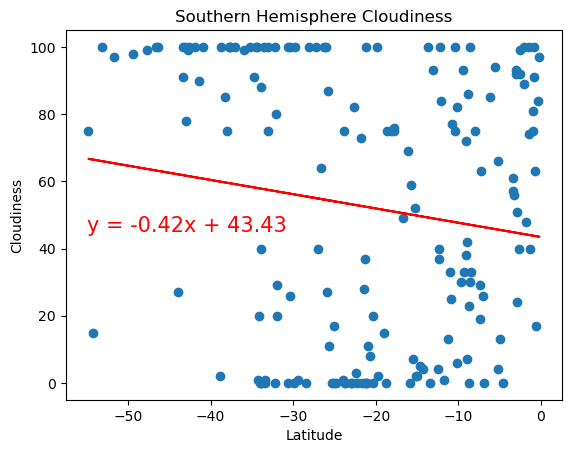

In [28]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Cloudiness"]
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(x_axis,y_axis)
pe_fit = pe_slope * x_axis + pe_int
equation = f"y = {round(pe_slope,2)}x + {round(pe_int,2)}"

print(f"The r-value is: {pe_r}")
print(f"The p-value is: {pe_p}")

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
plt.plot(x_axis, pe_fit, color="r")
plt.text(-55,45,equation,color="r",fontsize=15) 
plt.title("Southern Hemisphere Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** 
There is no relationship between cloudiness and latitude.  With r values of 0 and p values of .84 and .99, we see no correlation between how close you are to the equator and cloudiness.  

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.14394886332009943
The p-value is: 0.003004287302397101


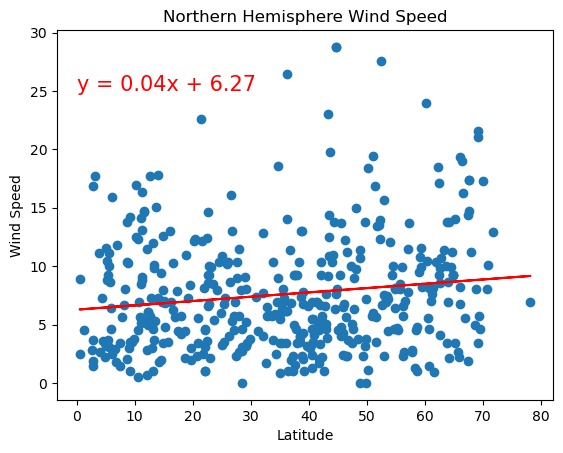

In [25]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Wind Speed"]
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(x_axis,y_axis)
pe_fit = pe_slope * x_axis + pe_int
equation = f"y = {round(pe_slope,2)}x + {round(pe_int,2)}"

print(f"The r-value is: {pe_r}")
print(f"The p-value is: {pe_p}")

plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
plt.plot(x_axis, pe_fit, color="r")
plt.text(0,25,equation,color="r",fontsize=15) 
plt.title("Northern Hemisphere Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r-value is: -0.20203067760498708
The p-value is: 0.007509022675290128


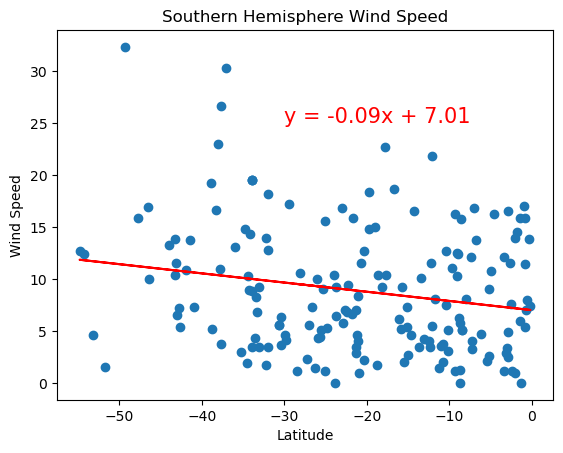

In [26]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Wind Speed"]
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(x_axis,y_axis)
pe_fit = pe_slope * x_axis + pe_int
equation = f"y = {round(pe_slope,2)}x + {round(pe_int,2)}"

print(f"The r-value is: {pe_r}")
print(f"The p-value is: {pe_p}")

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
plt.plot(x_axis, pe_fit, color="r")
plt.text(-30,25,equation,color="r",fontsize=15) 
plt.title("Southern Hemisphere Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** 
Though r values of .14 and .2 suggest a weak correlation between latitude and wind speed, both the northern and southern hemispheres have p values of less than .05, suggesting that there may be a significant relationship between wind speed and latitude.  Specifically, the closer you get to the equator, the slower the wind speed.  